<a href="https://colab.research.google.com/github/vanshika-tiwari123/Mall-Customer-Segmentation/blob/main/Copy_of_MALL_CUSTOMER_SEGMENTATION_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MALL CUSTOMER SEGMENTATION ANALYSIS**





k-Means clustering

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection

In [ ]:
#load dataset
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#statistical info


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


NO NULL VALUES PRESENT IN THE DATASET TAKEN.


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Exploratory Data Analysis**

Text(0, 0.5, 'Count')

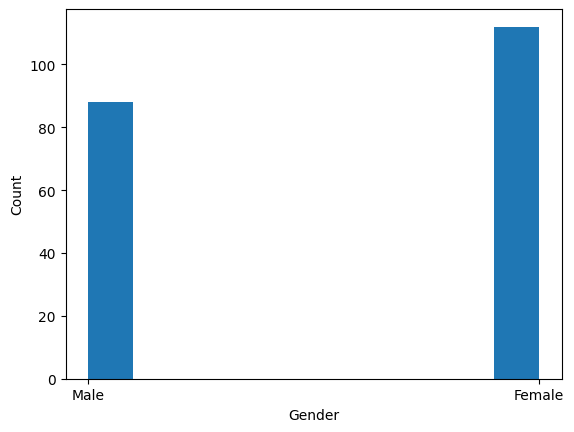

In [ ]:
plt.hist(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')


/tmp/ipython-input-8-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

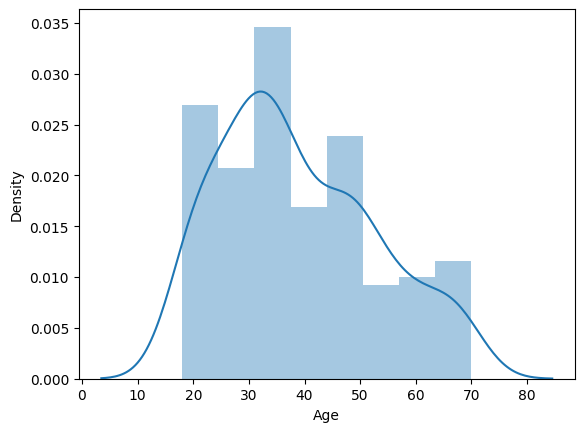

In [ ]:
sns.distplot(df['Age'])

/tmp/ipython-input-9-1994242243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

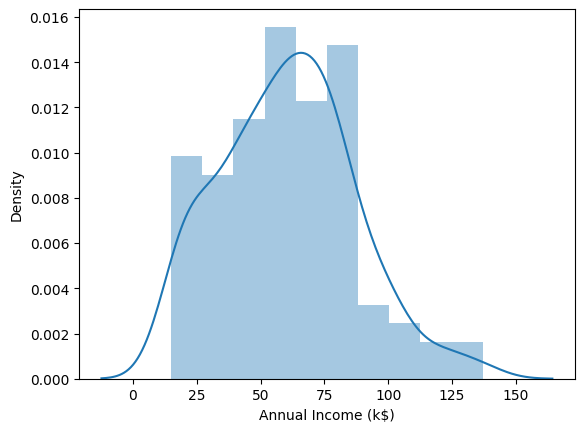

In [ ]:
sns.distplot(df['Annual Income (k$)'])

/tmp/ipython-input-10-3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

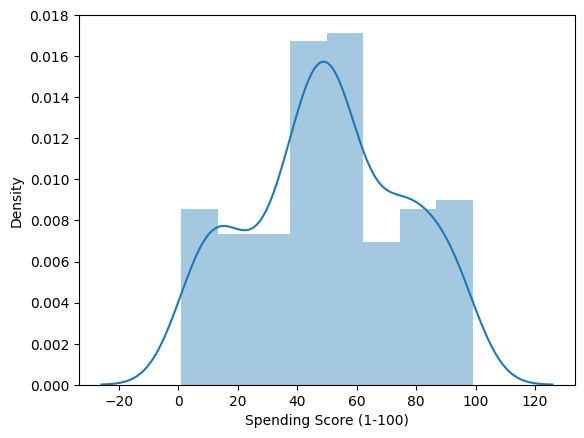

In [ ]:
sns.distplot(df['Spending Score (1-100)'])

CORRELATION MATRIX


<Axes: >

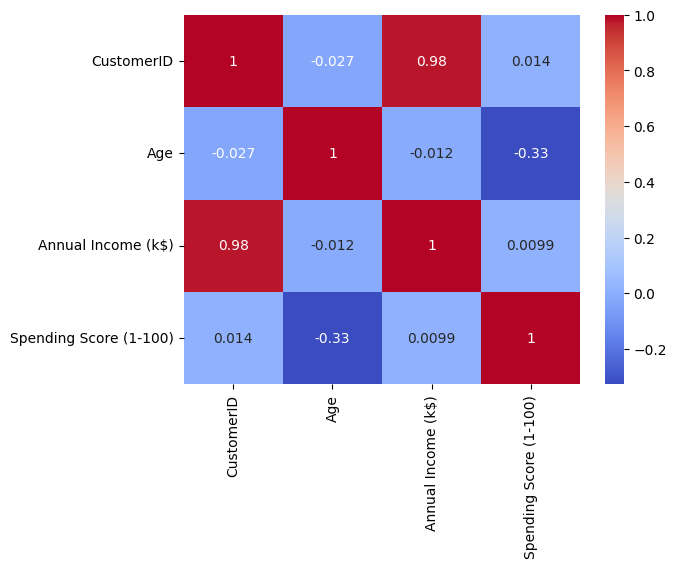

In [ ]:
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')



**DATA CLEANING**

In [ ]:
#dropping the customer Id
df1=df.drop('CustomerID',axis=1)
df1


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# **MODEL TRAINING**

2 DIMENSION

In [ ]:
#Clustering
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
#clustering for 2-D data
df2=df1[['Annual Income (k$)','Spending Score (1-100)']]
df2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

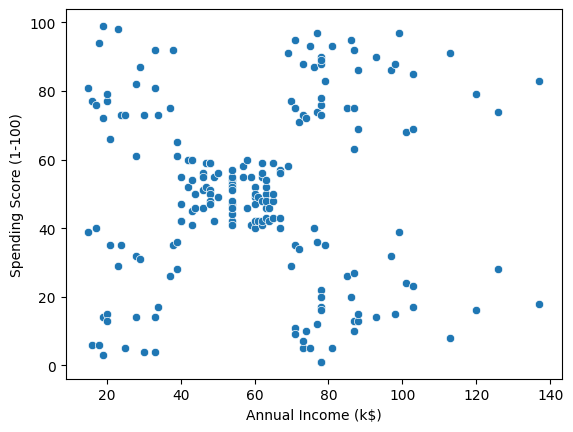

In [ ]:
# before scatter plot
sns.scatterplot(x=df2['Annual Income (k$)'],y=df2['Spending Score (1-100)'])


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    Km=KMeans(n_clusters=i)
    Km.fit(df2)
    wcss.append(Km.inertia_)


Text(0, 0.5, 'WCSS')

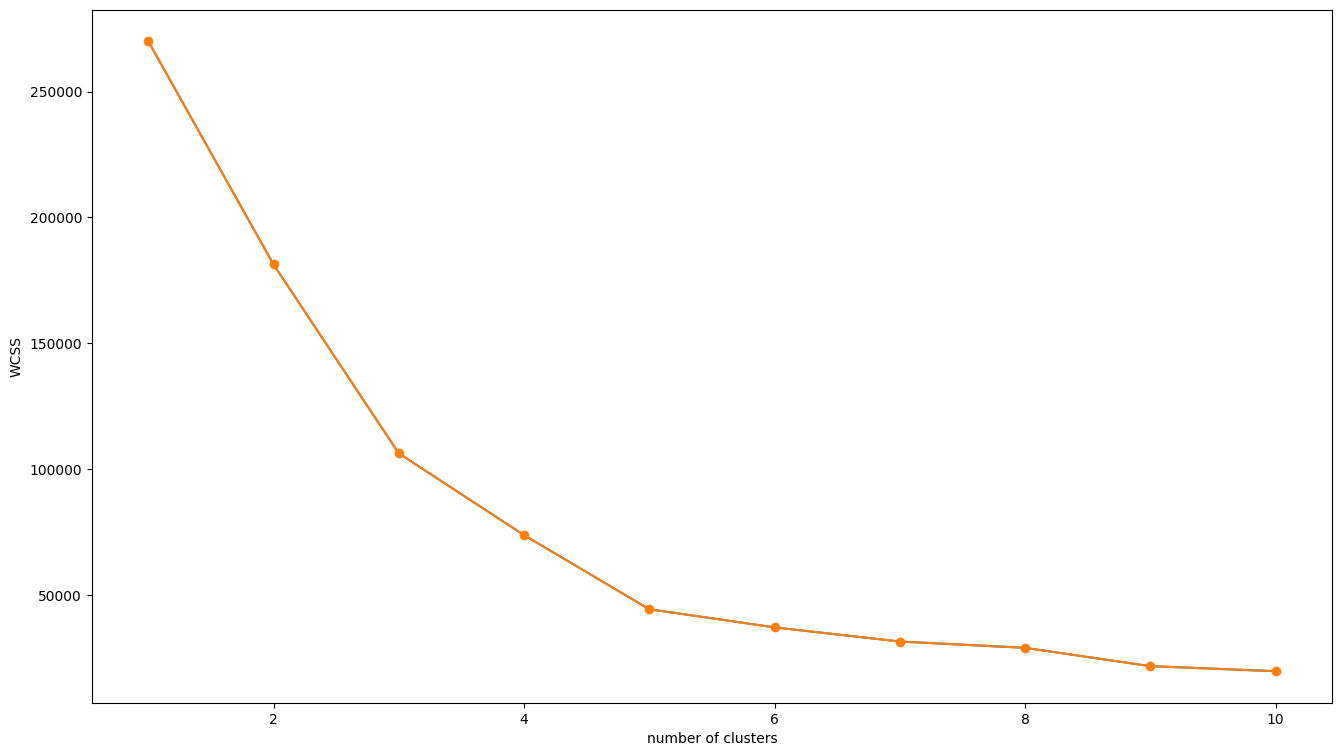

In [ ]:
#plot the line for elbow point(finding the clusters)
plt.figure(figsize=(16,9))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')


# We have found the elbow point as 5,so there will be 5 clusters for a given datasets.

In [ ]:
#finding the particular cluster for each customer
Km=KMeans(n_clusters=5)
Km.fit(df2)
y=Km.predict(df2)
df2['label']=y
df2.head()

/tmp/ipython-input-18-4117740116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label']=y


,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

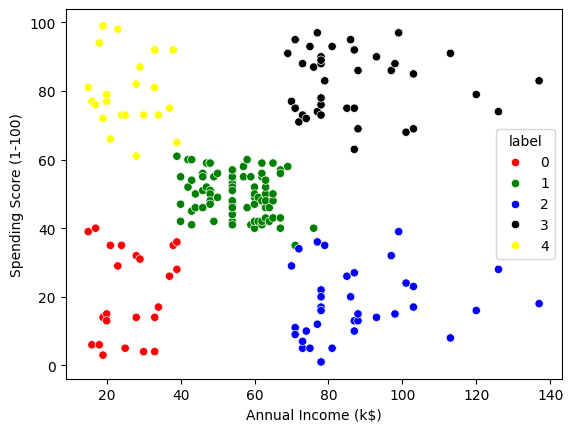

In [ ]:
#resulting scatter plot
sns.scatterplot(x=df2['Annual Income (k$)'],y=df2['Spending Score (1-100)'],hue=df2['label'],palette=['red','green','blue','black','yellow'])


Therefore, customers with annual income 0-40 and spending score 0-40 are in Yellow cluster(4). customers with annual income 0-40 and spending score 60-100 are in Blue cluster(2). customers with annual income 40-80 and spending score 35-60 are in Red cluster(0). customers with annual income 75-140 and spending score 0-40 are in Black cluster(3). customers whose spending score is 60-100 and annual income is 75-140 is in Green cluster(1).


# **Model training**

3 DIMENSION

In [ ]:
#clustering for 3-D data
df3=df1[['Annual Income (k$)','Spending Score (1-100)','Age']]


In [ ]:
df3.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [ ]:
#before scatter plot for 3d
import plotly.express as px
fig=px.scatter_3d(x=df3['Annual Income (k$)'],y=df3['Spending Score (1-100)'],z=df3['Age'])
fig.show()

In [ ]:

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    Km=KMeans(n_clusters=i)
    Km.fit(df3)
    wcss.append(Km.inertia_)

Text(0, 0.5, 'WCSS')

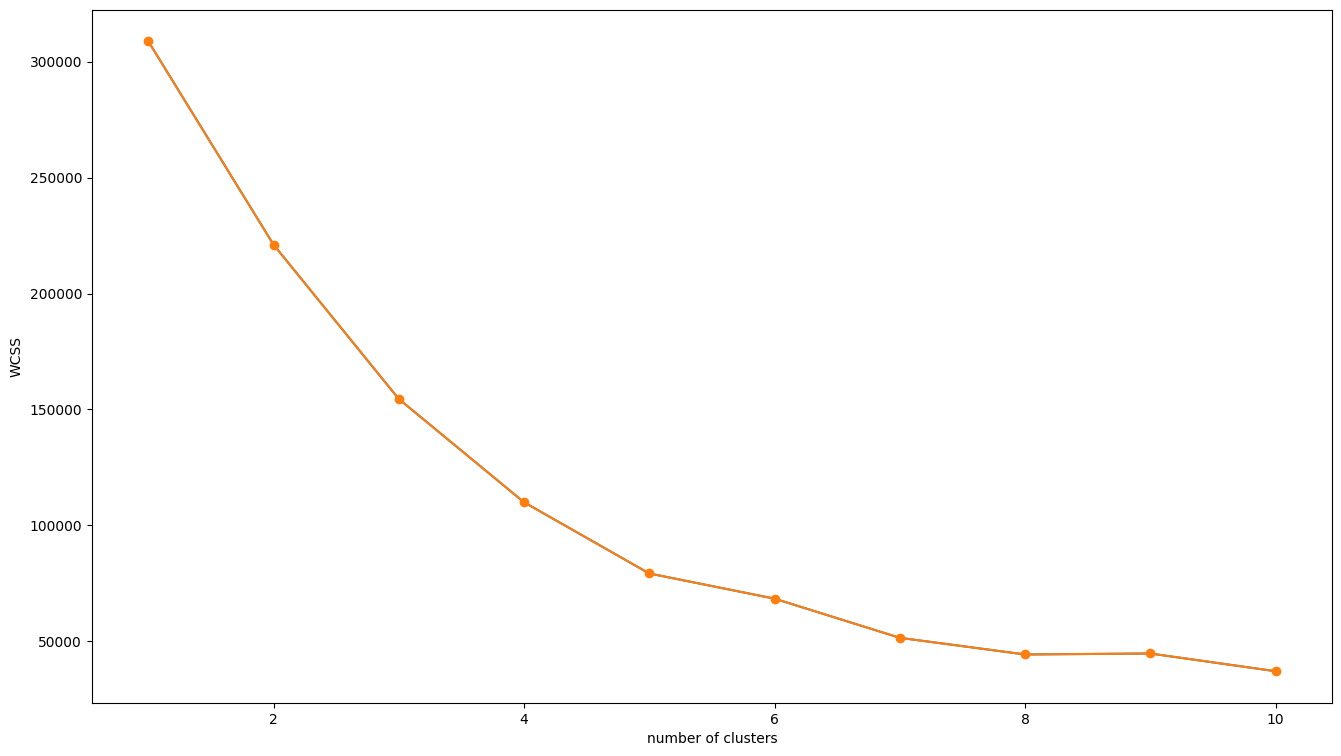

In [ ]:
#plot the line for elbow point(finding the clusters)
plt.figure(figsize=(16,9))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')


We have found the elbow point as 5,so there will be 5 clusters for a given datasets.

# **Evaluate the model**

In [ ]:
#finding the particular cluster for each customer
Km=KMeans(n_clusters=5)
Km.fit(df3)
y=Km.predict(df3)
df3['label']=y
df3.head()



,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,3
1,15,81,21,3
2,16,6,20,0
3,16,77,23,3
4,17,40,31,0


In [ ]:
#resulting scatter plot
import plotly.express as px
fig=px.scatter_3d(x=df3['Annual Income (k$)'],y=df3['Spending Score (1-100)'],z=df3['Age'],color=df3['label'])
fig.show()


**Customers in a mall is segmented into 5 Clusters.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Save the KMeans model
joblib.dump(Km, 'mall_customer_segmentation.pkl')

# Encode the 'Gender' column and save the LabelEncoder
gender_encoder = LabelEncoder()
gender_encoder.fit(df['Gender'])
joblib.dump(gender_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
import gradio as gr
import joblib
import numpy as np

# Load the saved model for predictions
kmeans = joblib.load('mall_customer_segmentation.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Define the prediction function
def predict_cluster(gender, age, annual_income, spending_score):
        # Encode gender
        gender_encoded = label_encoder.transform([gender])[0]

        # Create input data
        data = np.array([[gender_encoded, age, annual_income, spending_score]])

        # Predict the cluster
        cluster = kmeans.predict(data)[0]

        # Return the result
        return f"The customer belongs to cluster: {cluster}"


# Create the Gradio interface
interface = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Dropdown(choices=['Male', 'Female'], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Annual Income (k$)"),
        gr.Number(label="Spending Score (1-100)"),
    ],
    outputs=gr.Textbox(label="Predicted Cluster"),
    title="Mall Customer Segmentation",
    description="Enter customer details to find their cluster."
)

# Launch the Gradio app
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f250b8e13644316274.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
